In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina' 

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

# Data 소개
사용된 데이터는 서울 열린데이터광장의 [서울시 공공와이파이 위치정보 데이터](http://data.seoul.go.kr/dataList/OA-1218/S/1/datasetView.do;jsessionid=1024575F5105EFBB20B362FF4C6925E7.new_portal-svr-11) 입니다.

※ 데이터 기입 오류 등의 문제가 위경도에 존재하여 이를 미리 처리한 데이터를 이용하였습니다. -> 해당 "처리"를 아래 코드에 추가함

In [65]:
df = pd.read_csv("wifi_loc_seoul.csv",encoding='euc-kr')
df

,구명,유형,설치주소,지역명,상세설치장소,설치기관(회사),설치위치(X좌표),설치위치(Y좌표),콘텐츠아이디
0,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120001
1,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120002
2,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120003
3,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 1F,서울시(시스코),127.088505,37.479804,WF120004
4,강남구,복지센터등,아동복지센터,강남구 광평로34길 124,아동복지센터 2F,서울시(시스코),127.088505,37.479804,WF120005
...,...,...,...,...,...,...,...,...,...
13839,중랑구,전통시장,전통시장,동일로139다길 40,NaN,자치구,127.076361,37.605022,WN001715
13840,중랑구,공원,용마폭포공원,용마산로 250-12,용마폭포공원,자치구,127.090378,37.573137,WN001716
13841,중랑구,공원,용마폭포공원,용마산로 250-12,용마폭포공원,자치구,127.091151,37.572857,WN001717
13842,중랑구,공공기관,중랑구청,봉화산로 179,구청 3층 건설관리과,자치구,127.0927988,37.60652433,WN001718


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13844 entries, 0 to 13843
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구명         13844 non-null  object
 1   유형         13844 non-null  object
 2   설치주소       13844 non-null  object
 3   지역명        13844 non-null  object
 4   상세설치장소     13275 non-null  object
 5   설치기관(회사)   13844 non-null  object
 6   설치위치(X좌표)  13827 non-null  object
 7   설치위치(Y좌표)  13826 non-null  object
 8   콘텐츠아이디     13844 non-null  object
dtypes: object(9)
memory usage: 973.5+ KB


In [41]:
# !pip install missingno==0.4.1

<AxesSubplot:>

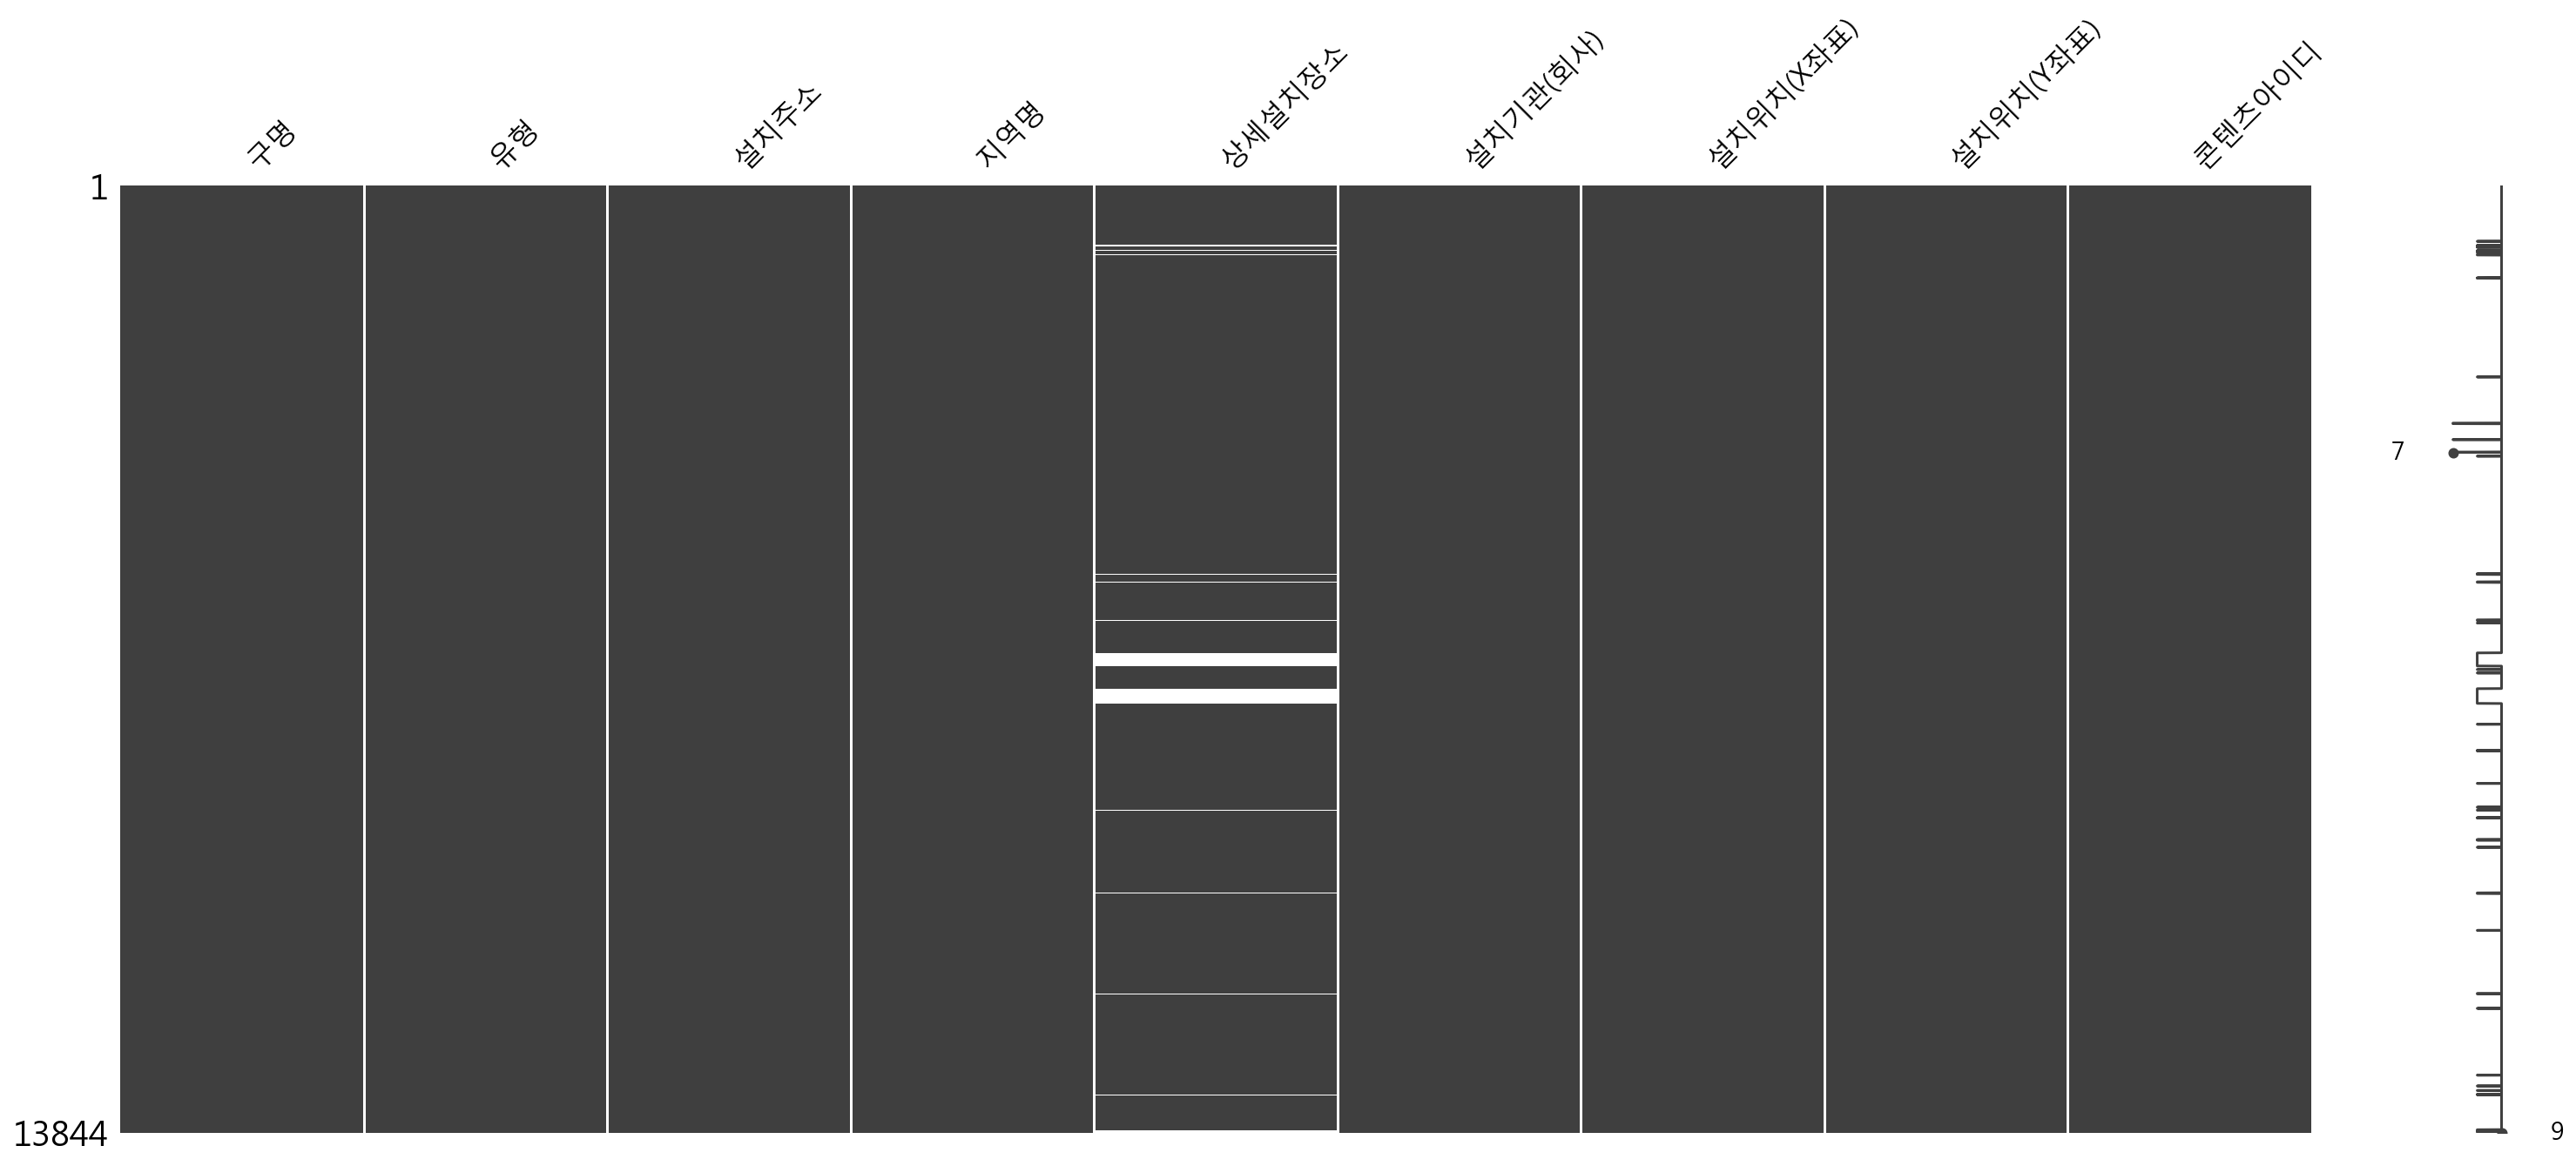

In [67]:
import missingno

missingno.matrix(df) # 아래 코드에서 [상세설치장소]는 활용되고 있지 않으니 무시합니다.

In [68]:
df.columns = ['gu','type','address','area','detail','comp','lon','lat','id']
del df['detail']

In [69]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13826 entries, 0 to 13843
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gu       13826 non-null  object
 1   type     13826 non-null  object
 2   address  13826 non-null  object
 3   area     13826 non-null  object
 4   comp     13826 non-null  object
 5   lon      13826 non-null  object
 6   lat      13826 non-null  object
 7   id       13826 non-null  object
dtypes: object(8)
memory usage: 972.1+ KB


In [70]:
df[ df['lon'].str.contains('E') ] # 추후 lon & lat 를 float 로 변환 시 에러를 발생 시키므로 아래 행은 제외합니다.

,gu,type,address,area,comp,lon,lat,id
11460,은평구,복지센터등,에버그린하우스,갈현로 29길 51 B01(갈현동 267-57),서울시(다산),126.91E,37.62N,WF190989
11465,은평구,복지센터등,은평구지역사회보장협의체,연서로 137(구산동 1-1) 영진빌딩 4층,서울시(다산),126.5455E,37.3640E,WF190994


In [71]:
df[ df['lat'].str.contains('/') ] # 추후 lon & lat 를 float 로 변환 시 에러를 발생 시키므로 아래 행은 제외합니다.

,gu,type,address,area,comp,lon,lat,id
8307,성동구,주요거리,마장중학교 주변,성동구 마장동 766-35,서울시(다산),127.040648,37.56/647,WF171203


In [72]:
df = df[ ~(df['lon'].str.contains('E')) & ~(df['lat'].str.contains('/')) ]

In [73]:
df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13823 entries, 0 to 13843
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gu       13823 non-null  object 
 1   type     13823 non-null  object 
 2   address  13823 non-null  object 
 3   area     13823 non-null  object 
 4   comp     13823 non-null  object 
 5   lon      13823 non-null  float64
 6   lat      13823 non-null  float64
 7   id       13823 non-null  object 
dtypes: float64(2), object(6)
memory usage: 971.9+ KB


# 구별 공공 Wifi 현황

In [74]:
google_colors = ['#4285F4','#EA4335','#FBBC05','#34A853']

In [75]:
tmp = df.groupby(['gu'],as_index=False).agg({'id':'count'})

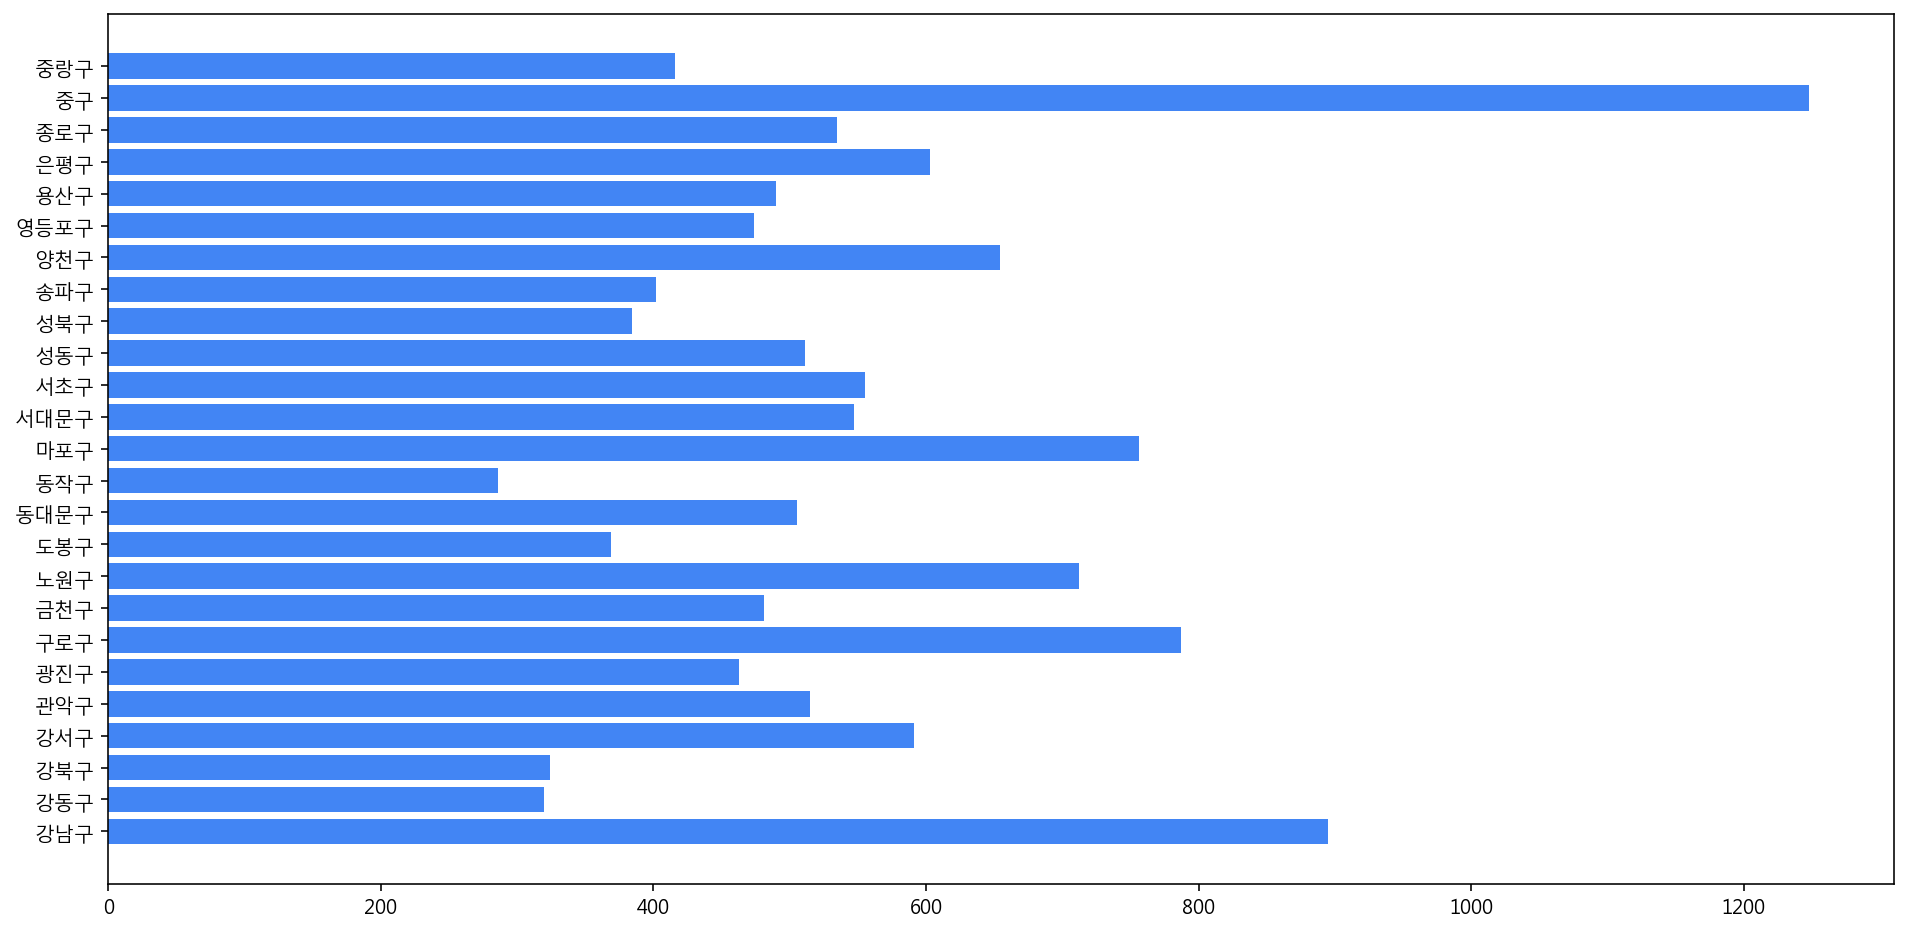

In [76]:
fig,ax = plt.subplots(figsize=(16,8))

ax.barh(y=tmp['gu'],width=tmp['id'],color=google_colors[0])
plt.show()

In [77]:
threshold = 500

In [78]:
tmp1 = tmp[tmp['id'] <= threshold].sort_values('id',ascending=True)
tmp2 = tmp[tmp['id'] > threshold].sort_values('id',ascending=True)

In [79]:
ax_font_dict = {'fontsize':12,'fontweight':'bold'}
title_font_dict = {'fontsize':18,'fontweight':'bold'}

In [80]:
yticks = list(np.arange(0,len(tmp)))
yticklabels = list(tmp1['gu'])+list(tmp2['gu'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


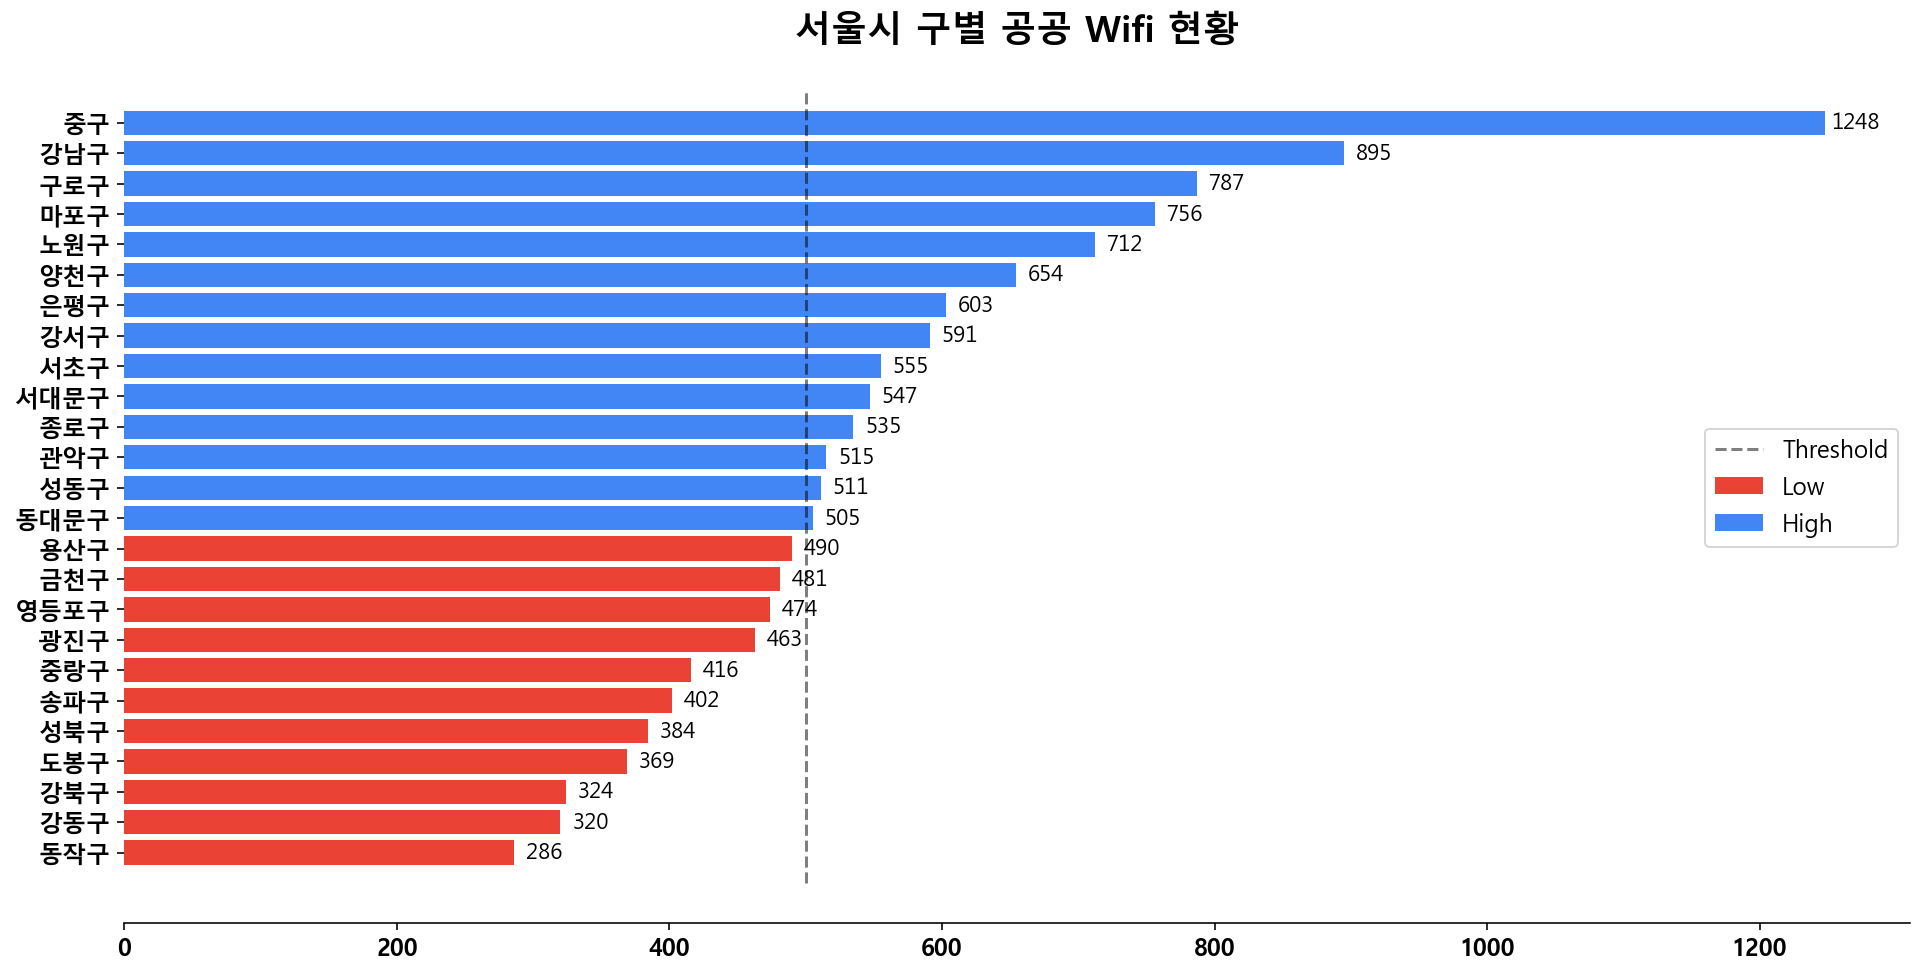

In [81]:
# 참고 : https://jehyunlee.github.io/2020/12/17/Python-DS-48-suneung/

fig, ax = plt.subplots(figsize=(16,8),sharex=True)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, ax_font_dict)
ax.set_xticklabels(np.arange(0,1400,200), ax_font_dict)

ax.barh(y=tmp1['gu'],width=tmp1['id'], color=google_colors[1])
ax.barh(y=tmp2['gu'],width=tmp2['id'], color=google_colors[0])

ax.vlines(threshold, ymin=-1, ymax=tmp['gu'].nunique(), linestyles='dashed',alpha=0.5,color='black')
ax.set_title("서울시 구별 공공 Wifi 현황", title_font_dict)

ax.legend(labels=["Threshold",'Low','High'], loc='center right',fontsize='large')

for i in yticks:
    xx = tmp.loc[tmp['gu'] == yticklabels[i], 'id'].values[0]
    ax.annotate(xx, xy = (xx, i), xytext = (15,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# 구별, 통신사별 공공 Wifi 현황

In [82]:
skt = ['미래부(SKT)', 'SKT', '서울시(SKT)']
kt = ['미래부(KT)', 'KT', '서울시(KT)'] 
uplus = ['미래부(LGU+)', 'LGU+', '서울시(LGU+)']
telecom_dict = {'SKT':skt, 'KT':kt, 'LGU+':uplus}

In [83]:
df1 = df[df['comp'].apply(lambda x : x in skt + kt + uplus)]

lst = []

for i,row in df1.iterrows():
    for key,values in telecom_dict.items():
        if row.comp in values:
            lst.append(key)

In [84]:
df1['telecom'] = lst

In [85]:
tmp = df1.pivot_table(index=['gu', 'telecom'], values='id', aggfunc='count').reset_index()

In [86]:
tmp1 = tmp[tmp['telecom']=='LGU+']
tmp2 = tmp[tmp['telecom']=='KT']
tmp3 = tmp[tmp['telecom']=='SKT']

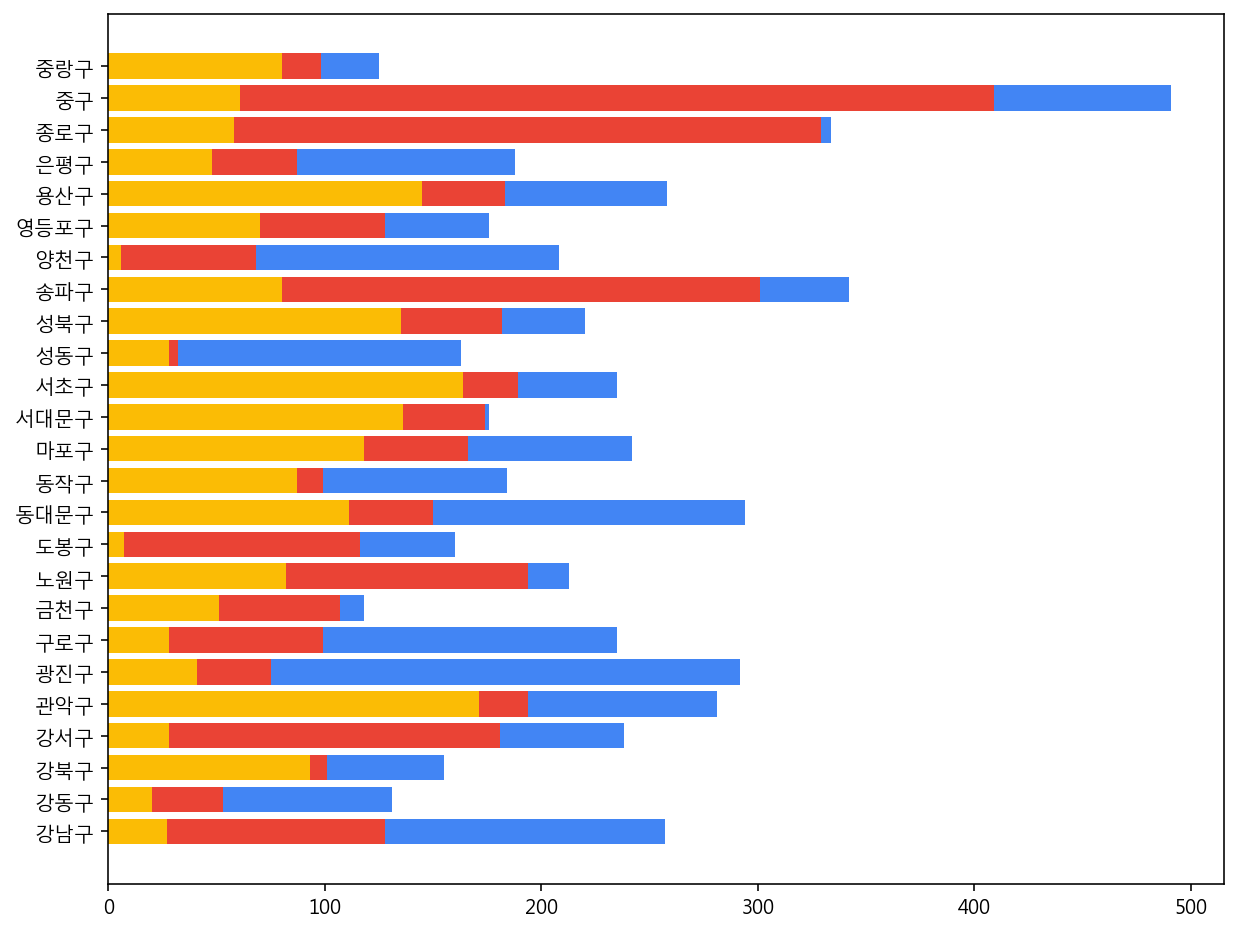

In [87]:
fig,ax = plt.subplots(figsize=(10,8))

ax.barh(y=tmp1['gu'], width=tmp1['id'], color=google_colors[2])
ax.barh(y=tmp2['gu'], width=tmp2['id'], color=google_colors[1], left=tmp1['id'].values)
ax.barh(y=tmp3['gu'], width=tmp3['id'], color=google_colors[0], left=(tmp1['id'].values + tmp2['id'].values))

plt.show()

In [88]:
yticks = list(np.arange(0, len(tmp1)))
yticklabels = list(df1.pivot_table(index='gu', values='id', aggfunc='count').reset_index().sort_values('id', ascending=True)['gu'])

In [89]:
tmp1 = pd.merge(pd.DataFrame(yticklabels,columns=['gu']), tmp1, on='gu')
tmp2 = pd.merge(pd.DataFrame(yticklabels,columns=['gu']), tmp2, on='gu')
tmp3 = pd.merge(pd.DataFrame(yticklabels,columns=['gu']), tmp3, on='gu')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


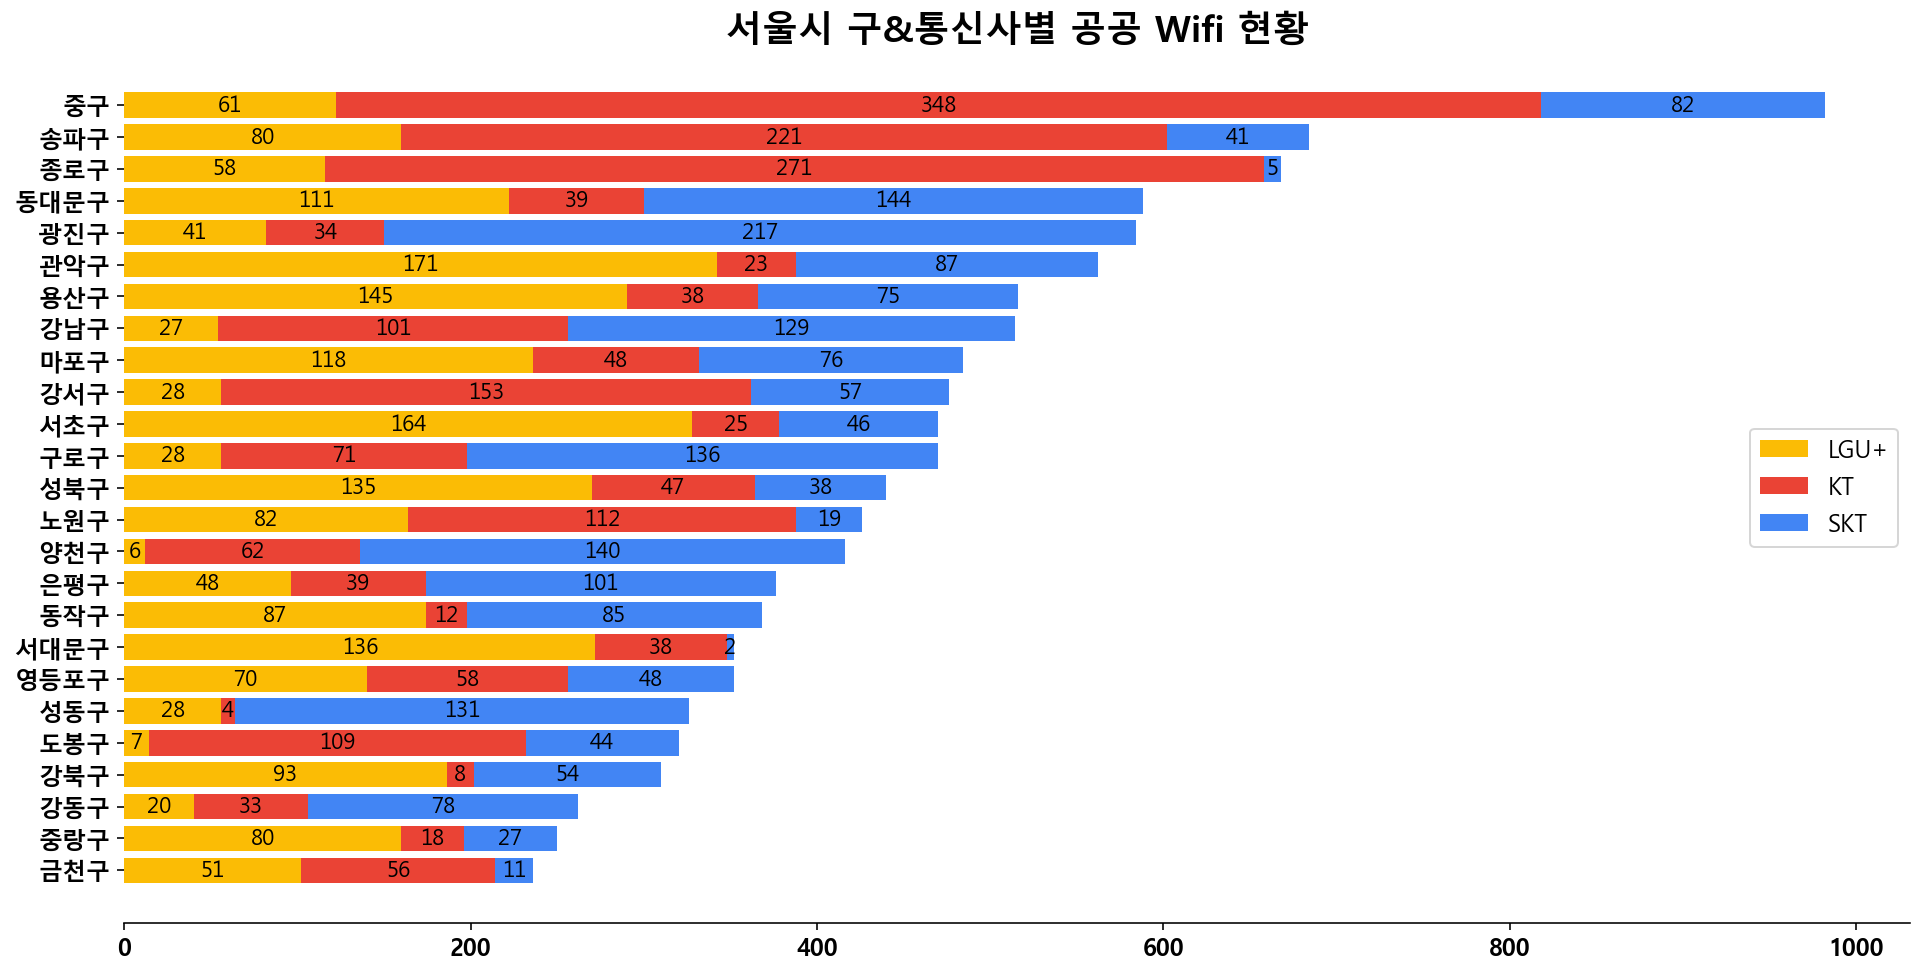

In [90]:
fig,ax = plt.subplots(figsize=(16,8), sharex=True)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, ax_font_dict)
ax.set_xticklabels(np.arange(0, 1400, 200), ax_font_dict)

ax.barh(y=tmp1['gu'], width=tmp1['id'], color=google_colors[2])
ax.barh(y=tmp2['gu'], width=tmp2['id'], color=google_colors[1], left=tmp1['id'].values)
ax.barh(y=tmp3['gu'], width=tmp3['id'], color=google_colors[0], left=(tmp1['id'].values + tmp2['id'].values))

ax.set_title("서울시 구&통신사별 공공 Wifi 현황", title_font_dict)

ax.legend(labels = ['LGU+', 'KT', 'SKT'], loc='center right', fontsize='large')

for i in yticks:
    xx1 = tmp1.loc[tmp1['gu']==yticklabels[i], 'id'].values[0]
    xx2 = tmp2.loc[tmp1['gu']==yticklabels[i], 'id'].values[0]
    xx3 = tmp3.loc[tmp1['gu']==yticklabels[i], 'id'].values[0]

    ax.annotate(xx1, xy = (xx1/2, i), xytext = (0,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)
    ax.annotate(xx2, xy = (xx1+xx2/2, i), xytext = (0,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)
    ax.annotate(xx3, xy = (xx1+xx2+xx3/2, i), xytext = (0,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# 통신사별 공공 Wifi 현황

In [91]:
tmp1 = tmp[tmp['telecom']=='LGU+'].sort_values('id', ascending=False).drop('telecom', axis=1)
tmp2 = tmp[tmp['telecom']=='KT'].sort_values('id', ascending=False).drop('telecom', axis=1)
tmp3 = tmp[tmp['telecom']=='SKT'].sort_values('id', ascending=False).drop('telecom', axis=1)

In [92]:
dict_1 = dict(gu=['etc'], id=[np.sum(tmp1[15:]['id'])])
dict_2 = dict(gu=['etc'], id=[np.sum(tmp2[15:]['id'])])
dict_3 = dict(gu=['etc'], id=[np.sum(tmp3[15:]['id'])])

In [93]:
tmp1 = pd.concat([tmp1[:15], pd.DataFrame(data=dict_1)])
tmp2 = pd.concat([tmp2[:15], pd.DataFrame(data=dict_2)])
tmp3 = pd.concat([tmp3[:15], pd.DataFrame(data=dict_3)])

In [94]:
cmap1 = plt.get_cmap("YlOrBr")
cmap2 = plt.get_cmap("Reds")
cmap3 = plt.get_cmap("Blues")

colors1 = cmap1(sorted(np.arange(len(tmp1)) * 6, reverse=True))
colors2 = cmap2(sorted(np.arange(len(tmp1)) * 9, reverse=True))
colors3 = cmap3(sorted(np.arange(len(tmp1)) * 9, reverse=True))

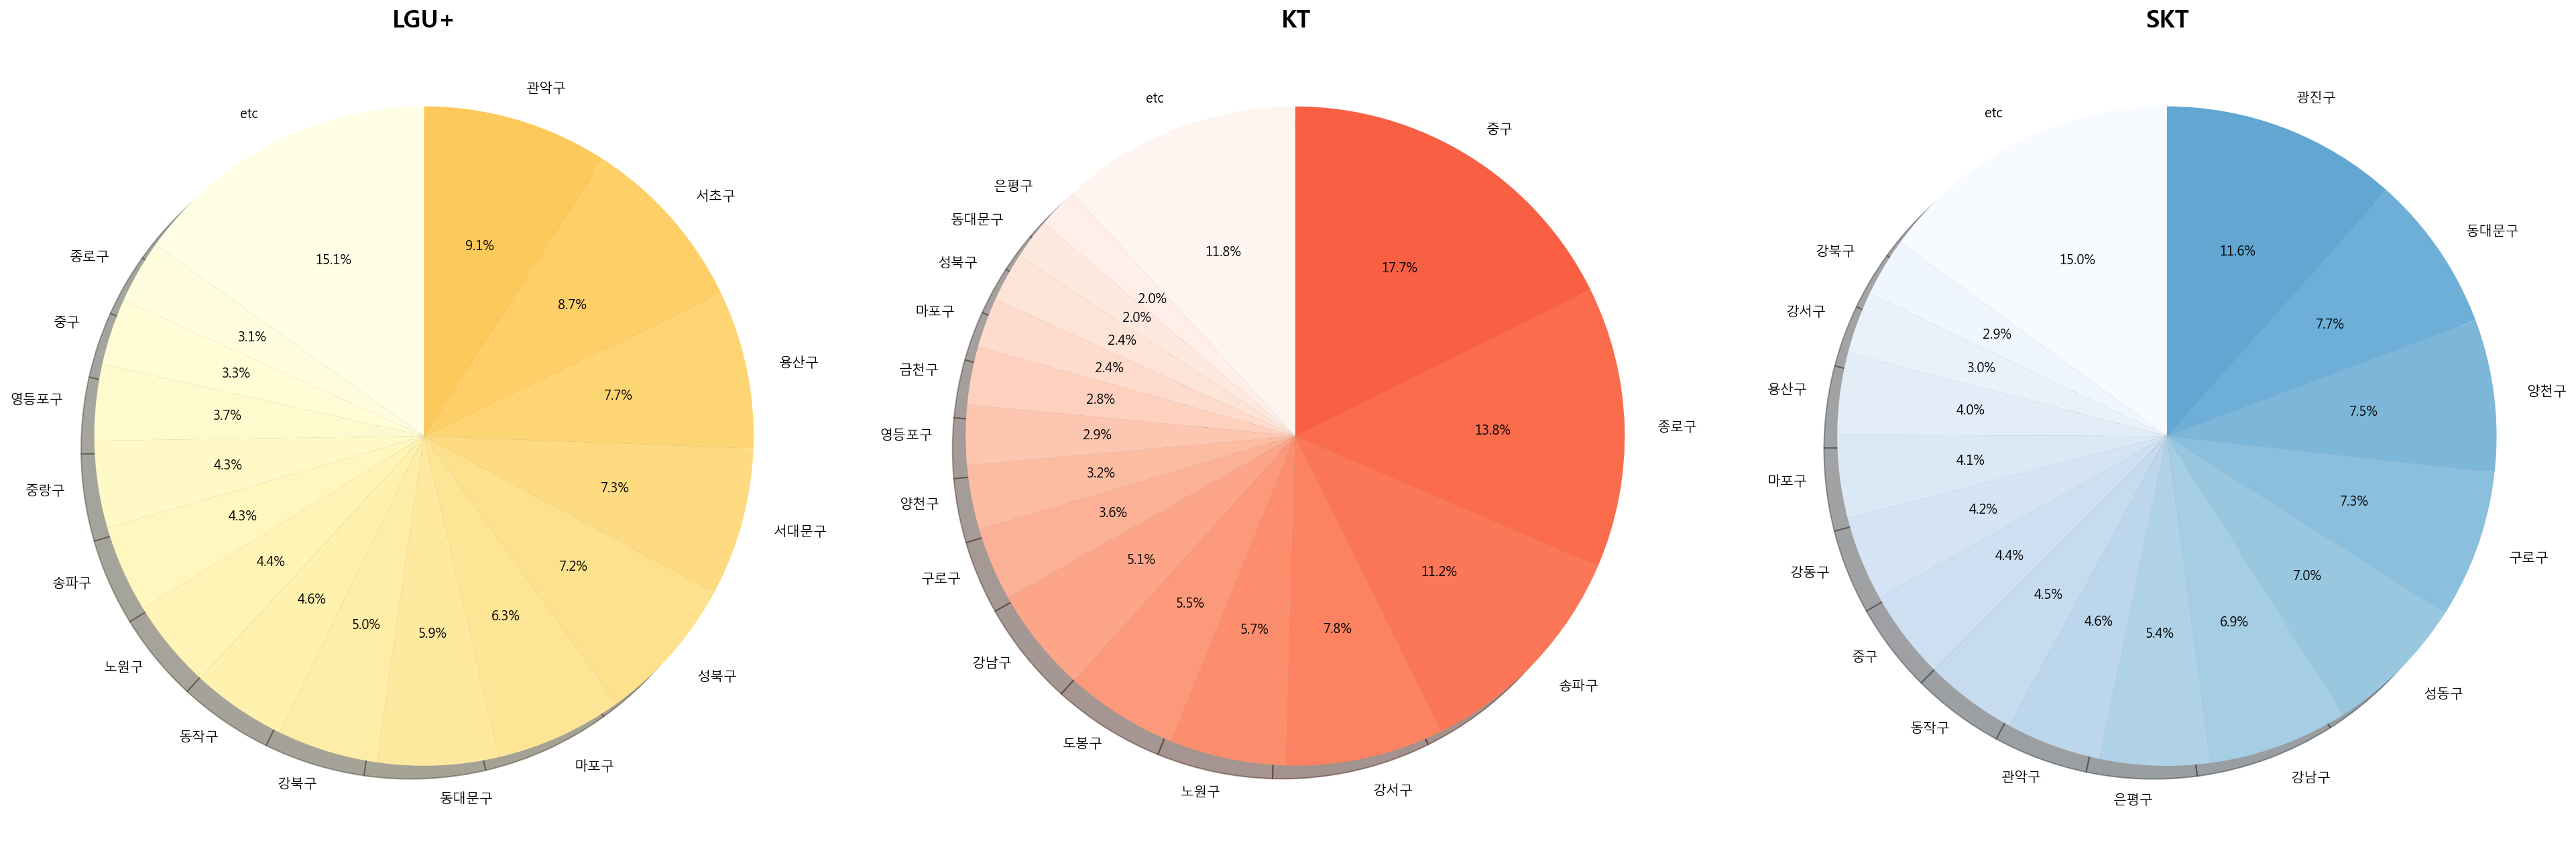

In [95]:
fig,axes = plt.subplots(1,3,figsize=(33,11))

axes[0].pie(tmp1['id'], labels=tmp1['gu'], autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False, colors=colors1)
axes[0].axis('equal')

axes[1].pie(tmp2['id'], labels=tmp2['gu'], autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False, colors=colors2)
axes[1].axis('equal')

axes[2].pie(tmp3['id'], labels=tmp3['gu'], autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False, colors=colors3)
axes[2].axis('equal')

axes[0].set_title("LGU+", title_font_dict)
axes[1].set_title("KT", title_font_dict)
axes[2].set_title("SKT", title_font_dict)

plt.show()

# 지도 시각화

In [96]:
import folium

## Base

In [97]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='cartodbpositron')
map

이외 다른 tile 옵션은 다음과 같습니다.

    'tiles' options
    - Open street map (default) 
    - Map Quest Open 
    - MapQuest Open Aerial 
    - Mapbox Bright 
    - Mapbox Control Room 
    - Stamenterrain 
    - Stamentoner 
    - Stamenwatercolor 
    - cartodbpositron 
    - cartodbdark_matter


출처: https://dailyheumsi.tistory.com/144?category=854906 [하나씩 점을 찍어 나가며]

## CircleMarker

In [98]:
import sys

sys.setrecursionlimit(1500)
print(sys.getrecursionlimit())

1500


In [99]:
df = df[df['lon'].isnull() == False]

In [104]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='cartodbpositron')

for row in df.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=1.5, color='tomato', fill=True).add_to(map)

map

## Marker + Cluster

In [103]:
from folium.plugins import MarkerCluster

map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='cartodbpositron')

mc = MarkerCluster()
for row in df.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lon])) 
    map.add_child(mc) 

map

In [37]:
# map.save(os.path.join('Plugins_1.html'))

In [102]:
from folium.plugins import HeatMap

df1 = [[row['lat'],row['lon']] for index, row in df.loc[:, ['lon', 'lat']].iterrows()]

map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='Stamenterrain')

HeatMap(df1, radius=15, blur=15).add_to(map)

map

## Areal data

In [105]:
import json

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [119]:
dat = df.groupby('gu').count().iloc[:, 0]
dat = dat.reset_index()
dat.columns = ['gu', 'count']
dat = dat.set_index('gu')

In [120]:
dat.head(3)

,count
gu,
강남구,895
강동구,320
강북구,324


In [121]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='Stamenterrain')

map.choropleth(geo_data = geo_str, 
               data = dat2['count'],
               columns = [dat2.index, dat2['count']],
               fill_color = 'YlGn',
               key_on = 'feature.id')

map